# Data preparation, analysis and prediction on Titanic Dataset 

## Import Libraries

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data

In [364]:
titanic_df = pd.read_csv('titanic.csv')

In [365]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.225,NaN,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.750,NaN,Q
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.500,A26,C
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S


## Data Cleaning and Preparation

In [366]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [367]:
sns.set_style('darkgrid')

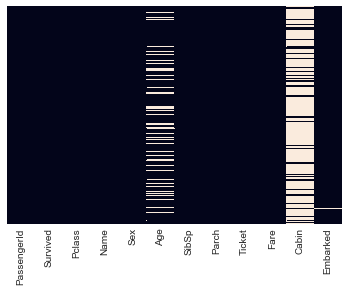

In [368]:
sns.heatmap(titanic_df.isnull(), cbar=False, yticklabels=False)

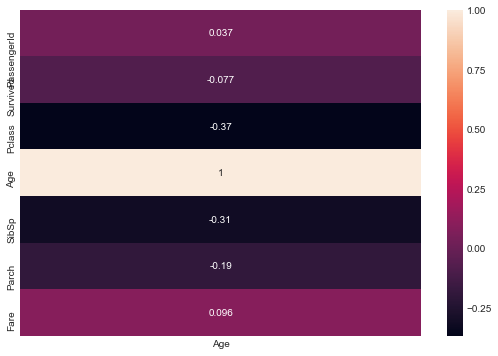

In [369]:
corr_age = pd.DataFrame(titanic_df.corr()['Age'], index=titanic_df.columns)
plt.figure(figsize=(9, 6))
sns.heatmap(corr_age.dropna(), annot=True)

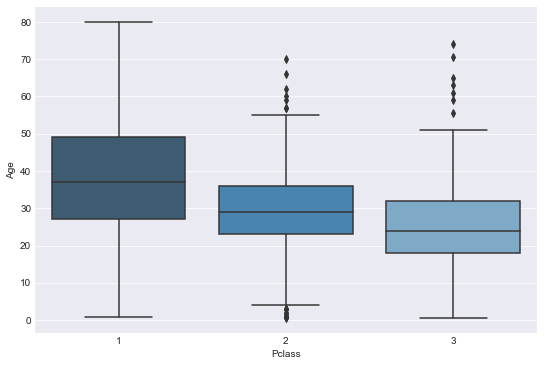

In [370]:
plt.figure(figsize=(9,6))
sns.boxplot(x='Pclass', y='Age', data=titanic_df, palette='Blues_d')

In [371]:
def impute_age(column):
    Age = column[0]
    Pclass = column[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [372]:
titanic_df['Age'] = titanic_df[['Age', 'Pclass']].apply(impute_age, axis=1) 

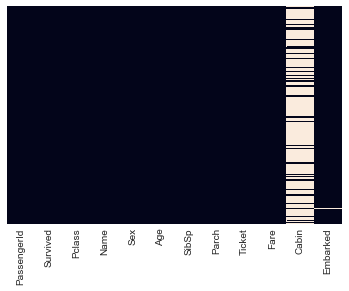

In [373]:
sns.heatmap(titanic_df.isnull(), cbar=False, yticklabels=False)

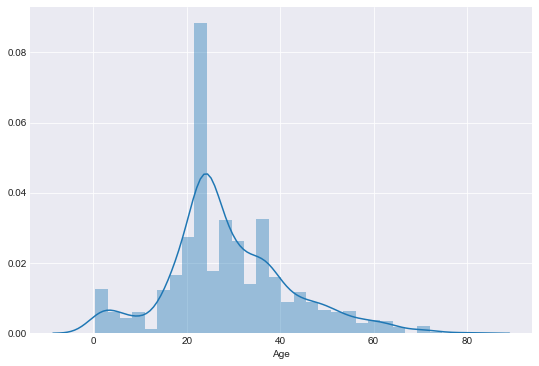

In [374]:
plt.figure(figsize=(9,6))
sns.distplot(titanic_df['Age'], bins=30)

In [375]:
titanic_df.drop('Cabin', axis=1, inplace=True)

In [376]:
titanic_df.dropna(inplace=True)

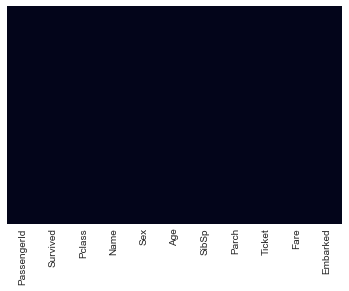

In [377]:
sns.heatmap(titanic_df.isnull(), cbar=False, yticklabels=False)

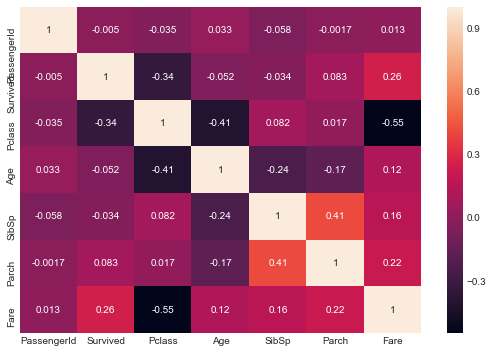

In [378]:
plt.figure(figsize=(9,6))
sns.heatmap(titanic_df.corr(), annot=True)

In [379]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Data Analysis and Visualization

In [380]:
titanic_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
852,0,3,female,9.0,1,1,15.2458,C
281,0,3,male,28.0,0,0,7.8542,S
17,1,2,male,29.0,0,0,13.0000,S
701,1,1,male,35.0,0,0,26.2875,S
871,1,1,female,47.0,1,1,52.5542,S


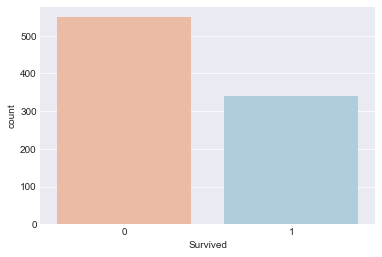

In [381]:
sns.countplot('Survived', data=titanic_df, palette='RdBu')

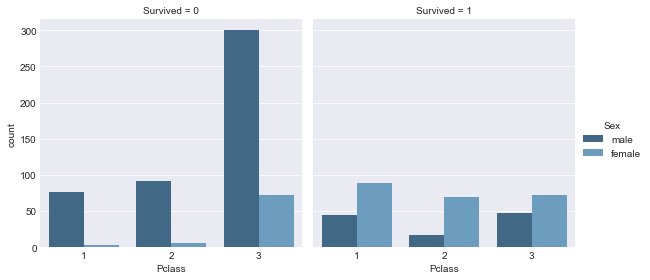

In [382]:
sns.factorplot(x='Pclass', col='Survived', hue='Sex', kind='count', data=titanic_df, palette='Blues_d')

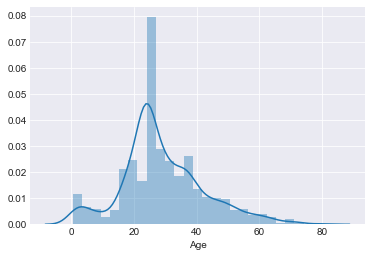

In [383]:
sns.distplot(titanic_df.Age)

Text(0,0.5,'Person')

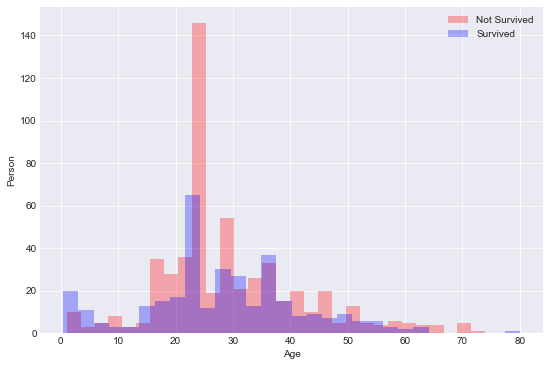

In [384]:
plt.figure(figsize=(9,6))
titanic_df[titanic_df.Survived==0]['Age'].hist(label='Not Survived', color='Red', alpha=0.3, bins=30)
titanic_df[titanic_df.Survived==1]['Age'].hist(label='Survived', color='Blue', alpha=0.3, bins=30)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Person')

# Building a Prediction model using Logistic Regression

In [385]:
from sklearn.model_selection import train_test_split

In [394]:
titanic_df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250


In [387]:
sex_dm = pd.get_dummies(titanic_df.Sex, drop_first=True)
embarked_dm = pd.get_dummies(titanic_df.Embarked, drop_first=True)

In [393]:
titanic_df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [395]:
titanic_df = pd.concat([titanic_df, sex_dm, embarked_dm], axis=1)
titanic_df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


In [396]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [397]:
from sklearn.linear_model import LogisticRegression

In [398]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [403]:
pred = logmodel.predict(X_test)

In [402]:
from sklearn.metrics import classification_report, confusion_matrix

In [405]:
print(confusion_matrix(y_test,pred))

[[152  17]
 [ 35  63]]


In [406]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.81      0.90      0.85       169
          1       0.79      0.64      0.71        98

avg / total       0.80      0.81      0.80       267

